In [52]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
from tqdm import tqdm
import utils
import seaborn as sns
from IPython import display



In [53]:
# Import data 
game_state_20, game_state_40, game_state_60, game_state_80, game_state_100 = utils.get_inputs()

selected_dataset = game_state_40

selected_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
blueChampionKill,64556.0,7.991883,4.708893,0.0,5.00,8.0,11.0,36.0
blueFirstBlood,64556.0,0.483146,0.499720,0.0,0.00,0.0,1.0,1.0
blueDragonKill,64556.0,0.437310,0.567677,0.0,0.00,0.0,1.0,3.0
blueDragonHextechKill,64556.0,0.073254,0.260555,0.0,0.00,0.0,0.0,1.0
blueDragonChemtechKill,64556.0,0.073920,0.261643,0.0,0.00,0.0,0.0,1.0
blueDragonFireKill,64556.0,0.075469,0.264149,0.0,0.00,0.0,0.0,1.0
blueDragonAirKill,64556.0,0.071163,0.257099,0.0,0.00,0.0,0.0,1.0
blueDragonEarthKill,64556.0,0.072433,0.259206,0.0,0.00,0.0,0.0,1.0
blueDragonWaterKill,64556.0,0.071070,0.256944,0.0,0.00,0.0,0.0,1.0
blueDragonElderKill,64556.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


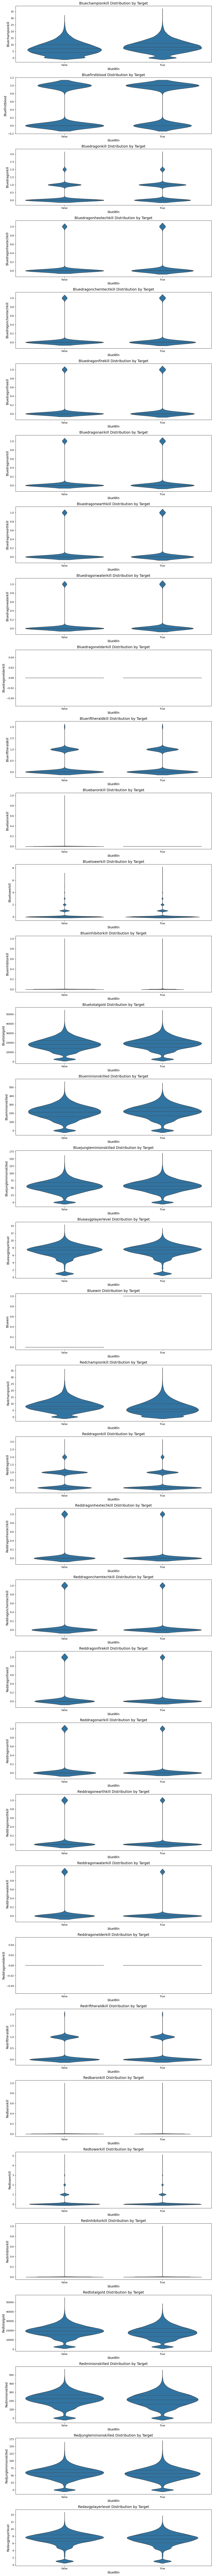

In [54]:
# Visualize data

cont_cols = [f for f in selected_dataset.columns if selected_dataset[f].dtype != '0']
n_rows = len(cont_cols)

fig, axs = plt.subplots(n_rows, 1, figsize=(12, 4 * n_rows))

for i, col in enumerate(cont_cols):
    sns.violinplot(x='blueWin', y=col, data=selected_dataset, ax=axs[i], inner="quart", bw_adjust = 1.1)
    axs[i].set_title(f'{col.title()} Distribution by Target', fontsize=14)
    axs[i].set_xlabel('blueWin', fontsize=12)
    axs[i].set_ylabel(col.title(), fontsize=12)
    #sns.despine()

fig.tight_layout()

plt.show()

In [55]:
# Prepare training, validation, and test datasets for 20% game time


train_frac = 0.8
valid_frac = 0.1

train_set = selected_dataset.sample(frac = 0.8)
remaining_set = selected_dataset.drop(train_set.index)
valid_set = selected_dataset.sample(frac = valid_frac / (1 - train_frac))
test_set = selected_dataset.drop(valid_set.index)

# Separate wins
train_wins = train_set.pop('blueWin')
valid_wins = valid_set.pop('blueWin')
test_wins = test_set.pop('blueWin')

print(selected_dataset.shape, train_set.shape, valid_set.shape, test_set.shape)


(64556, 36) (51645, 35) (32278, 35) (32278, 35)


In [56]:
# Feature engineering

In [57]:
# Convert dataframes to tensors
train_data = tf.convert_to_tensor(train_set)
train_labels = tf.convert_to_tensor(train_wins)

valid_data = tf.convert_to_tensor(valid_set)
valid_labels = tf.convert_to_tensor(valid_wins)

#train_data = train_data[..., tf.newaxis]
#valid_data = valid_data[..., tf.newaxis]
# Define batches

def get_batch(data, labels, batch_size):
    return tf.data.Dataset.from_tensor_slices((data, labels)).batch(batch_size)

train_batched = get_batch(train_data, train_labels, 64)
valid_batched = get_batch(valid_data, valid_labels, 64)

print(tf.shape(train_data), tf.shape(train_labels))


tf.Tensor([51645    35], shape=(2,), dtype=int32) tf.Tensor([51645], shape=(1,), dtype=int32)


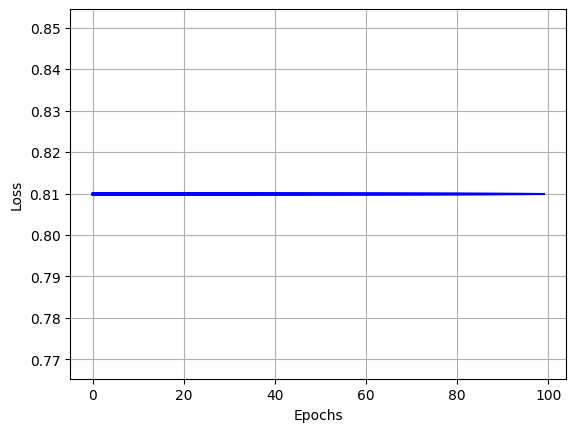

100%|██████████████████████████████████████████████████████████████████| 100/100 [04:45<00:00,  2.85s/it]


Loss: 0.8098983764648438, Accuracy: 0.5033594965934753, Validation Loss: 0.806799054145813, Validation Accuracy: 0.5064130425453186


In [63]:
# Define model
class DNNModel(tf.keras.Model):

    def __init__(self):
        super().__init__()
        # Single dense layer
        self.layer1 = tf.keras.layers.Dense(512, activation='relu', input_shape=(35,))
        self.layer2 = tf.keras.layers.Dense(512, activation='relu')
        self.layer3 = tf.keras.layers.Dense(1, activation='sigmoid')
        
    def call(self, input):
        input1 = self.layer1(input)
        input2 = self.layer2(input1)
        return self.layer3(input2)

model = DNNModel()

# Choose optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

valid_loss = tf.keras.metrics.Mean(name='validation_loss')
valid_accuracy = tf.keras.metrics.BinaryAccuracy(name='validation_accuracy')


# Define training step
@tf.function
def train_step(match_states, outcomes):
    with tf.GradientTape() as tape:  
        predictions = tf.squeeze(model.call(match_states))
        loss = loss_func(outcomes, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(outcomes, predictions)


# Define testing step
@tf.function
def test_step(match_states, outcomes):
    predictions = tf.squeeze(model.call(match_states))
    loss = loss_func(outcomes, predictions)

    valid_loss(loss)
    valid_accuracy(outcomes, predictions)

# Set output
output_dir = './output'
output_prefix = os.path.join(output_dir, "DNN_2l_20")


# Plots
loss_plot, loss_ax = plt.subplots()
loss_ax.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
dh = display.display(loss_plot, display_id=True)

# Run
EPOCHS = 100

x_plot, y_plot = [], []

for epoch in tqdm(range(EPOCHS)):
    train_loss.reset_states()

    for match_states, outcomes in train_batched:
        train_step(match_states, outcomes)

    
    x_plot.append(epoch)
    y_plot.append(train_loss.result().numpy())
    loss_ax.plot(x_plot, y_plot, color='blue')
    dh.update(loss_plot)
    time.sleep(0.1)

    
    if epoch % 10 == 0:
        model.save_weights(output_prefix)
        
plt.close()

for match_states, outcomes in valid_batched:
    test_step(match_states, outcomes)

print(f'Loss: {train_loss.result()}, 'f'Accuracy: {train_accuracy.result()}, 'f'Validation Loss: {valid_loss.result()}, 'f'Validation Accuracy: {valid_accuracy.result()}')

model.save_weights(output_prefix)